## Purpose
### The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual 
#### such as age, 
#### body mass index (bmi), 
#### gender etc to be used for predicting future medical expenses
#### of individuals that help medical 
#### insurance to make decision on charging the premium.
#### Predicting Insurance Premiums
 - Our simple dataset contains a few attributes for each person such as Age, Sex, BMI, Children, Smoker, Region and their charges
#### Aim
To use this info to predict charges for new customers

In [2]:
#loading the packages for multiple linear regression:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance=pd.read_csv('insurance.csv')
insurance.head()
#insurance['region'].unique()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


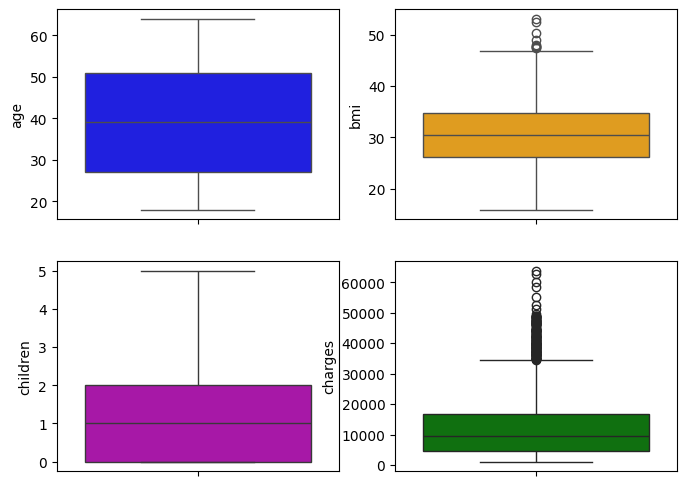

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))  
plt1 = sns.boxplot(insurance["age"], color='b', ax=axes[0][0])  
plt2 = sns.boxplot(insurance["bmi"], color='orange', ax=axes[0][1])  
plt3 = sns.boxplot(insurance["children"], color='m', ax=axes[1][0])
plt4 = sns.boxplot(insurance["charges"], color='g', ax=axes[1][1])

<Axes: ylabel='Frequency'>

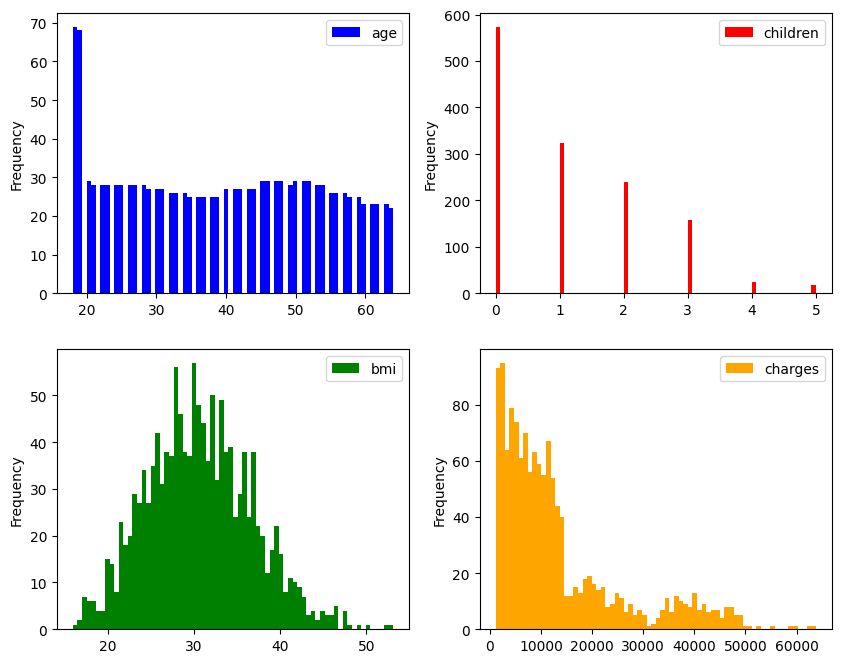

In [10]:
#### Univariate analysis:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

insurance.plot(kind='hist', y='age', bins=70, color='b', ax=axes[0][0])
insurance.plot(kind='hist', y='children', bins=70, color='r', ax=axes[0][1])
insurance.plot(kind='hist', y='bmi', bins=70, color='g', ax=axes[1][0])
insurance.plot(kind='hist', y='charges', bins=70, color='orange', ax=axes[1][1])

<Axes: xlabel='bmi', ylabel='charges'>

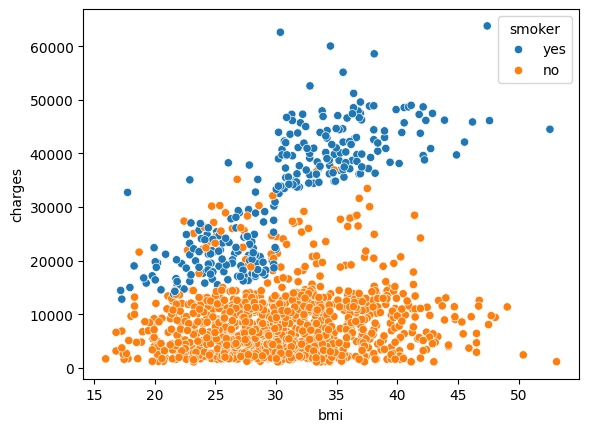

In [11]:
import seaborn as sns
sns.scatterplot(x='bmi',y='charges',data=insurance,hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

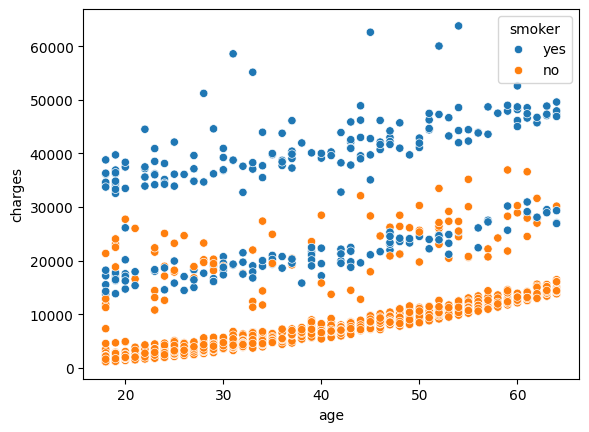

In [12]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='smoker')

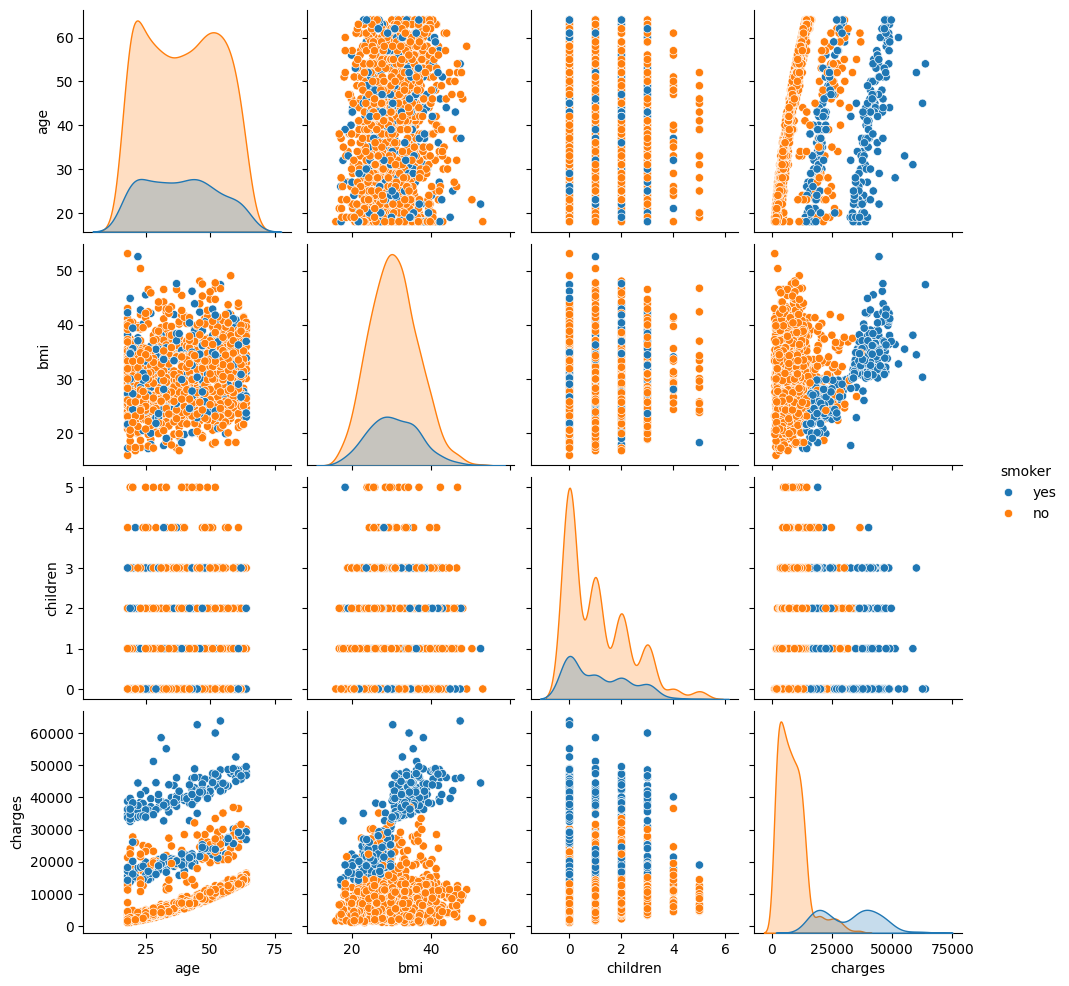

In [13]:
sns.pairplot(insurance,hue='smoker')

In [14]:
insurance.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [15]:
insurance=pd.get_dummies(data=insurance,columns=['sex','smoker','region'],drop_first=True,dtype=int)

In [16]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   int32  
 5   smoker_yes        1338 non-null   int32  
 6   region_northwest  1338 non-null   int32  
 7   region_southeast  1338 non-null   int32  
 8   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 68.1 KB


In [17]:
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [18]:
X=insurance.drop('charges',axis=1)

In [19]:
y=insurance['charges']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
df=pd.concat([y_train,X_train],axis=1)

In [22]:
df.head()

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
332,13429.03540,61,31.160,0,0,0,1,0,0
355,24603.04837,46,27.600,0,1,0,0,0,1
138,27322.73386,54,31.900,3,0,0,0,1,0
381,42303.69215,55,30.685,0,1,1,0,0,0
292,42112.23560,25,45.540,2,1,1,0,1,0


In [23]:
import statsmodels.formula.api as sm


In [24]:
model=sm.ols(formula="charges~age+bmi+children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest",data=df).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     333.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          6.51e-267
Time:                        03:26:25   Log-Likelihood:                -9492.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.237e+04   1210.540    -10.222      0.000   -1.47e+04   -9998.247
age                261.2969     14.435     18.102      0.000     232.968     289.626
bmi                348.9069     35.285      9.888      0.000     279.659     418.154
children           424.1191    166.972      2.540      0.011      96.432     751.806
sex_male           104.8118    404.887      0.259      0.796    -689.790     899.413
smoker_yes        2.363e+04    498.610     47.388      0.000    2.26e+04    2.46e+04
region_northwest  -486.9346    570.048     -0.854      0.393   -1605.668     631.799
region_southeast  -970.9688    579.867     -1.674      0.094   -2108.973     167.036
region_southwest  -926.3229    578.431     -1.601      0.110   -2061.509     208.863
==============================================================================
Omnibus:                      224.792   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.466
Skew:                           1.270   Prob(JB):                    9.73e-119
Kurtosis:                       5.735   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model=sm.ols(formula="charges~age+bmi+children+smoker_yes",data=df).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     667.1
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          1.42e-271
Time:                        03:26:25   Log-Likelihood:                -9494.7
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     931   BIC:                         1.902e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.247e+04   1159.558    -10.754      0.000   -1.47e+04   -1.02e+04
age          261.8497     14.416     18.164      0.000     233.558     290.142
bmi          333.4074     33.854      9.849      0.000     266.969     399.845
children     433.2261    166.827      2.597      0.010     105.825     760.627
smoker_yes  2.363e+04    497.414     47.499      0.000    2.27e+04    2.46e+04
==============================================================================
Omnibus:                      224.219   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.846
Skew:                           1.270   Prob(JB):                    9.80e-118
Kurtosis:                       5.714   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""